# Retrieving Datas for the Salinity anomalies for ORAS5

Here we try to get datas for the construction and visualization of salinity anomalies with python, using ORAS5 monthly data from 1979 to 2017 globally at spatial resolution of 0.25 degree. We try to do it just for 1979

In [1]:
import warnings
warnings.simplefilter('ignore') # filter some warning messages

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
year_start=1979
year_end=1979
#ORCA025
url=['http://icdc.cen.uni-hamburg.de/thredds/dodsC/ftpthredds/EASYInit/oras5/ORCA025/vosaline/opa0/vosaline_ORAS5_1m_'
     +str(year)+str("{0:0=2d}".format(month))+'_grid_T_02.nc' for year in range(year_start,year_end+1) 
     for month in range(1,13)]
#REGULAR
url_r=['http://icdc.cen.uni-hamburg.de/thredds/dodsC/ftpthredds/EASYInit/oras5/r1x1/vosaline/opa0/vosaline_ORAS5_1m_'
     +str(year)+str("{0:0=2d}".format(month))+'_r1x1.nc' for year in range(year_start,year_end+1) 
     for month in range(1,13)]
ds=xr.open_mfdataset(url_r)

We have loaded the multiple file dataset, so we go ahead calculating the mean map for the 1979 year: we load the variables of latitude, longitude, depth, time counter and the 4D salinity field:

In [3]:
ds

<xarray.Dataset>
Dimensions:       (deptht: 75, lat: 180, lon: 360, time_counter: 12)
Coordinates:
  * deptht        (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * lat           (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon           (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time_counter  (time_counter) datetime64[ns] 1979-01-16 ... 1979-12-16
Data variables:
    vosaline      (time_counter, deptht, lat, lon) float32 dask.array<shape=(12, 75, 180, 360), chunksize=(1, 75, 180, 360)>
Attributes:
    Conventions:                     CF-1.4
    NCO:                             4.4.6
    title:                           Monthly mean salinity
    source:                          ORAS5 - Ocean ReAnalysis System 5 (ECMWF)
    institution:                     European Centre for Medium-Range Weather...
    reference:                       https://www.ecmwf.int/en/research/climat...
    DODS_EXTRA.Unlimited_Dimension:  time_counter

In [4]:
lat = ds.lat
lon = ds.lon
deptht = ds.deptht
time_counter = ds.time_counter
S = ds.vosaline
np.shape(S)

(12, 75, 180, 360)

If we want to make the climatology over the whole period

In [5]:
salinity_climatology = S.mean(dim='time_counter')
np.shape(salinity_climatology)

(75, 180, 360)

Then we can make the mean over the top 700m

In [6]:
month_anom700m  = S[:,:,:,:].where(ds.deptht<700).mean(dim='deptht') - salinity_climatology.where(ds.deptht<700).mean(dim='deptht')
np.shape(month_anom700m)
np.shape(ds.vosaline.where(ds.deptht<700).mean(dim='deptht'))

(12, 180, 360)

And finally plot on a nice projection

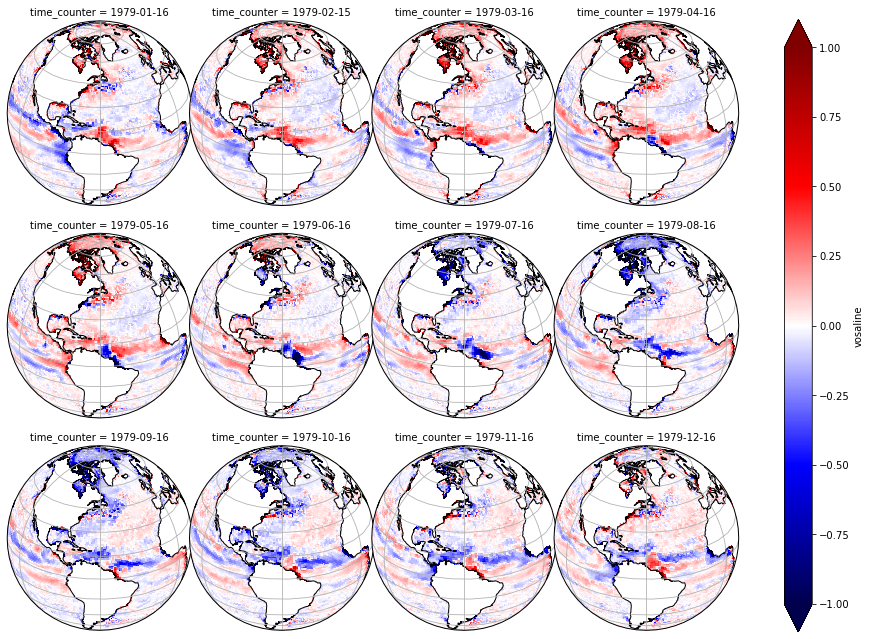

In [8]:
import cartopy.crs as ccrs
p = month_anom700m.plot(x='lon', y='lat', col='time_counter', col_wrap=4, transform=ccrs.PlateCarree(),
                        subplot_kws={'projection': ccrs.Orthographic(300, 26.5)}, cmap='seismic',
                        vmin=-1, vmax=1)
for ax in p.axes.flat:
    ax.coastlines(); ax.gridlines();